In [1]:
pip install scikit-learn-extra


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.5 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


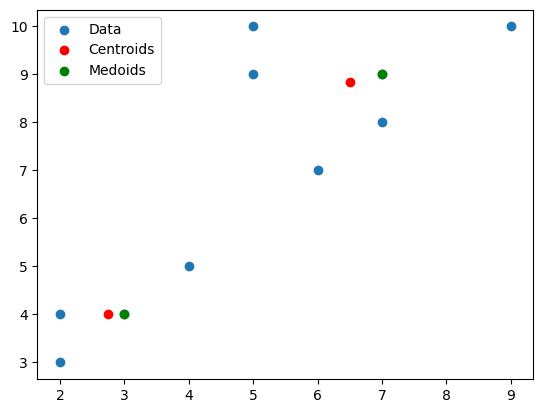

Centroids: [[2.75       4.        ]
 [6.5        8.83333333]]
Medoids: [[3. 4.]
 [7. 9.]]


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

data = [
    [2,4],[2,3],[3,4],[4,5],[6,7],[7,8],[9,10],[5,10],[5,9],[7,9]
]

df = pd.DataFrame(data, columns=['x', 'y'])

# KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df)

centroids = kmeans.cluster_centers_

# KMedoids
kmedoid = KMedoids(n_clusters=2, random_state=42)
kmedoid.fit(df)

medoids = kmedoid.cluster_centers_

plt.scatter(df['x'], df['y'], label='Data')
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', label='Centroids')
plt.scatter(medoids[:, 0], medoids[:, 1], color='green', label='Medoids')
plt.legend()
plt.show()

print("Centroids:", centroids)
print("Medoids:", medoids)


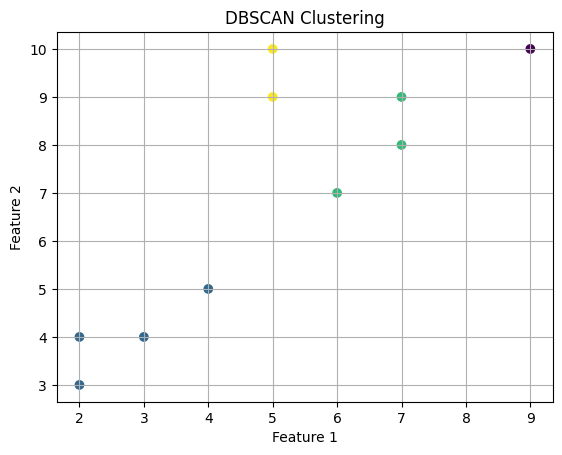

In [7]:
# Density Based Clustering (DBSCAN)

from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

x = df.values  
dbscan = DBSCAN(eps=1.5, min_samples=2)
db_labels = dbscan.fit_predict(x)

plt.scatter(x[:, 0], x[:, 1], c=db_labels)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clustering")
plt.grid()
plt.show()


In [8]:
tnj = [
{"Bread","Milk","Egg","Butter","Salt","Ap"},
{"Bread","Milk","Egg","Ap"},
{"Bread","Milk","Butter","Ap"},
{"Milk","Egg","Butter","Ap"},
{"Bread","Egg","S"},
{"Bread","Milk","Egg","Ap"}
]

print(tnj)

[{'M', 'B', 'Ap', 'S', 'Bu', 'E'}, {'M', 'B', 'Ap', 'E'}, {'M', 'B', 'Bu', 'Ap'}, {'M', 'Bu', 'Ap', 'E'}, {'S', 'B', 'E'}, {'M', 'B', 'Ap', 'E'}]


In [12]:
import pandas as pd

items = sorted(set().union(*tnj))
data = []

for t in tnj:
    row = {item: (1 if item in t else 0) for item in items}
    data.append(row)

df = pd.DataFrame(data)
df.index = range(1, len(df) + 1)
df.index.name = "Transaction"
print(df)

             Ap  B  Bu  E  M  S
Transaction                    
1             1  1   1  1  1  1
2             1  1   0  1  1  0
3             1  1   1  0  1  0
4             1  0   1  1  1  0
5             0  1   0  1  0  1
6             1  1   0  1  1  0
